In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, integrate
import statsmodels.api as sm
from statsmodels.formula.api import ols
sns.set()
%matplotlib inline

In [2]:
boston=load_boston()
X=pd.DataFrame(boston.data,columns=boston.feature_names)
y=pd.DataFrame(boston.target)
y.columns=['Price']

In [3]:
df=pd.concat([X,y],axis=1)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Univariate Linear Regression 
We have chosen LSTAT because of its high correlation with the median price of the houses  
n-1=505, alpha=0.5 --> t value=1.96

In [5]:
pc=df.corr(method='pearson',min_periods=1)
pc

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


### Fitting the model

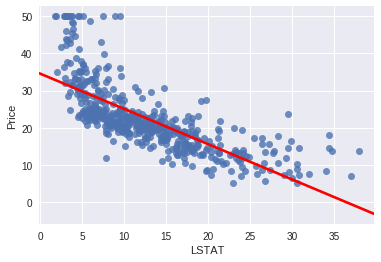

In [7]:
sns.regplot('LSTAT', 'Price', df, line_kws = {"color":"r"}, ci=None)

### Evaluating the model

In [6]:
m = ols('Price ~ LSTAT ',df).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Thu, 04 May 2017   Prob (F-statistic):           5.08e-88
Time:                        22:35:08   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

1. The coefficient of LSTAT here is -0.95, which means that one unit increase in Lower status of the population, will decrease the housing prices by \$950 dollars. 
2. The coefficient of determination or r-squared, tells us that 54.4% of the total variance in the price can be explained by our model.
3. Also, note that the p-value is 0 for LSTAT (which is <0.05), meaning LSTAT is statistically significant for predicting the target variable.

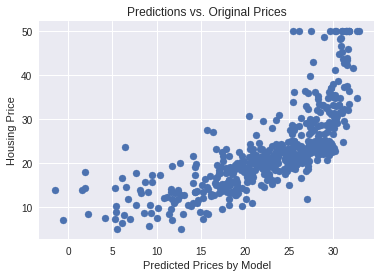

In [8]:
predicted_prices = m.fittedvalues

plt.scatter(predicted_prices,df.Price)

plt.xlabel("Predicted Prices by Model")
plt.ylabel("Housing Price")
plt.title("Predictions vs. Original Prices")

A perfect model would get us a scatterplot where all the data lies on the 45 degree line. That would mean that x = y, and every predicted price would have equalled the actual price.For low values of housing prices, the predictions are not that accurate.

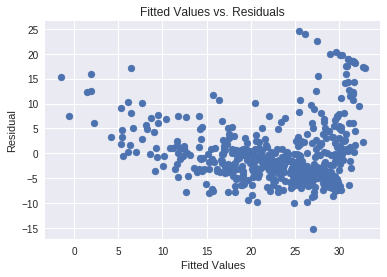

In [9]:
x = m.fittedvalues
y = m.resid
plt.scatter(x, y)

plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")

Here, very less points have an error of zero.Hence, our model isn’t performing well.

----

## Multivariate Regression
This time we will be using, along the LSTAT, the next highly correlated variable with Price.This feature is RM (average number of rooms per dwelling)

### Fitting the model

/home/arjun/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


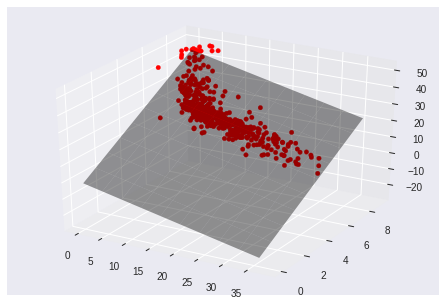

In [11]:
from mpl_toolkits.mplot3d import axes3d, Axes3D
fig = plt.figure()
ax = Axes3D(fig)

x_surf = np.arange(0, 40, 4)                # generate a mesh
y_surf = np.arange(0, 10, 1)
xx, yy = np.meshgrid(x_surf, y_surf)
exog = pd.core.frame.DataFrame({'LSTAT':xx.ravel(),'RM':yy.ravel()})
out = m.predict(exog=exog)
ax.plot_surface(xx, yy, out.reshape(xx.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4)
ax.scatter(df['LSTAT'], df['RM'], df['Price'], c='r', marker='o', alpha=1)
plt.show()

### Evaluating the model

In [10]:
m = ols('Price ~ LSTAT + RM',df).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Thu, 04 May 2017   Prob (F-statistic):          7.01e-112
Time:                        22:36:16   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3583      3.173     -0.428      0.6

1. The coefficient of LSTAT here is -0.6424, which means that one unit increase in Lower status of the population, will decrease the housing prices by \$624 dollars. 
2. The coefficient of RM is 5.0948,which means increasing a room, will increase the house price by \$5094.
3. The coefficient of determination or r-squared, tells us that 63.9% of the total variance in the price can be explained by our model.
4. The p-value is 0 for both LSTAT and RM, meaning both are statistically significant for predicting the target variable.


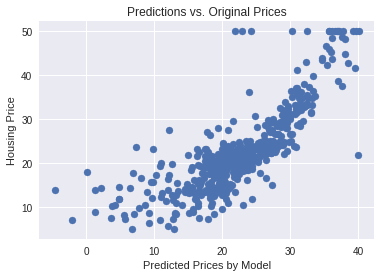

In [12]:
predicted_prices = m.fittedvalues

plt.scatter(predicted_prices,df.Price)

plt.xlabel("Predicted Prices by Model")
plt.ylabel("Housing Price")
plt.title("Predictions vs. Original Prices")

This graph is better than the graph of the univariate linear regression. It’s more along the 45 degree line. But still the predictions for lower housing prices are not that accurate.

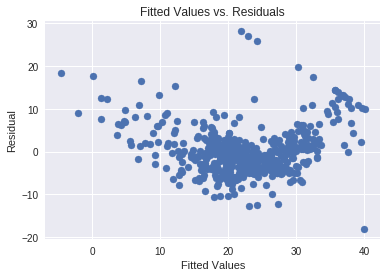

In [13]:
x = m.fittedvalues
y = m.resid
plt.scatter(x, y)

plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")

Here for large number of data points, the error is close to zero.We observe here that error follows a normal distribution.

## Multivariate Linear Regression
This time we will use all features of the boston housing dataset, except DIS, RAD and CHAS

In [14]:
m = ols('Price ~ CRIM + ZN  + INDUS + NOX + LSTAT + RM + AGE + PTRATIO + TAX + B',df).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     111.5
Date:                Thu, 04 May 2017   Prob (F-statistic):          6.60e-120
Time:                        22:37:59   Log-Likelihood:                -1541.9
No. Observations:                 506   AIC:                             3106.
Df Residuals:                     495   BIC:                             3152.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.8439      4.920      3.220      0.0

1. The coefficients for each of the variables can be interpreted as they were for univariate and bivariate regression. Only features RM, AGE and PTRATIO have p-value less than 0.05 and hence only these three features are statistically significant for describing the variance of the variable PRICE.
2. The coefficient of determination or r-squared, tells us that 69.2% of the total variance in the Price can be explained by our model.

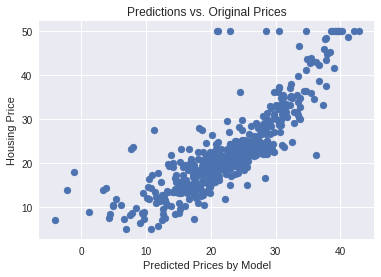

In [15]:
predicted_prices = m.fittedvalues

plt.scatter(predicted_prices,df.Price)

plt.xlabel("Predicted Prices by Model")
plt.ylabel("Housing Price")
plt.title("Predictions vs. Original Prices")
plt.savefig('predvsorig.png')

We have achieved an even better fit to the ideal 45 degree line. It is not perfect, but the model does perform well when more than two features are taken into account.

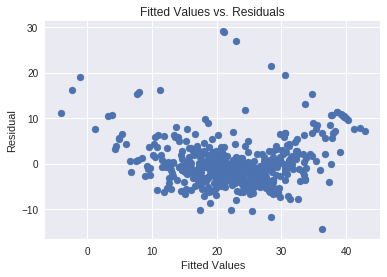

In [16]:
x = m.fittedvalues
y = m.resid
plt.scatter(x, y)

plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")
plt.savefig('fitvsres.png')

More number of data points are clustered around the zero error than bivariate regression. A better to fit to normal distribution if the errors is also achieved.

## Conclusion

We performed univariate, bivariate and multivariate regressions and the **multivariate linear regression** gave the best results.